# Fraud Dedections Explained

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_csv('/content/drive/MyDrive/Learn Data Science/Fraud detection/creditcard_sampledata.csv')
df1.head(3)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,64,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,-0.030522,-0.541957,0.237212,-0.218130,0.197437,-0.147850,-0.097830,-0.510053,-0.070939,0.355171,0.014777,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,34.70,0
1,1,64,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,-0.778135,-0.196290,0.632955,0.374025,-0.531597,-0.615063,-0.518078,0.003881,-1.288954,-0.797804,0.064133,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,54.99,0
2,2,124,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,0.651379,0.073787,-0.142024,-0.739457,0.502639,0.736688,0.256745,-0.093732,-1.011416,-1.465500,-0.239883,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,6.24,0


In [4]:
df1.shape

(8000, 32)

### Ration of fraud i.e Class=0 wrt not Fraud Class=1 

In [5]:
# Count the occurrences of fraud and no fraud and print them
occ = df1['Class'].value_counts()
print(occ)

0    7983
1      17
Name: Class, dtype: int64


In [6]:
# Print the ratio of fraud cases
print(occ / len(df1))

0    0.997875
1    0.002125
Name: Class, dtype: float64


## Plotting the two classes

In [7]:
## make subset of df1 with 5050 rows for plotting purpose...just 5500 rows and remove the 3 columns Unnamed,Time,Amount
df1.iloc[0:5050,:].drop(columns=['Unnamed: 0','Time','Amount']).shape

(5050, 29)

In [8]:
# classes or labels y
y=df1.iloc[0:5500,:]['Class'].values
y.shape

(5500,)

In [9]:
# features
X=df1.iloc[0:5500,:].drop(columns=['Unnamed: 0','Time','Amount','Class']).values
X.shape

(5500, 28)

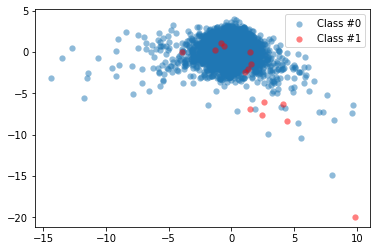

In [10]:
def plot_data(X, y):
	plt.scatter(X[y == 0, 1], X[y == 0, 2], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 1], X[y == 1, 2], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()
plot_data(X, y)

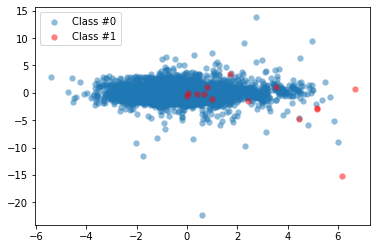

In [11]:
def plot_data(X, y):
	plt.scatter(X[y == 0, 3], X[y == 0, 4], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 3], X[y == 1, 4], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()
plot_data(X, y)

In [12]:
def plot_data(X, y):
	plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
	plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
	plt.legend()
	return plt.show()

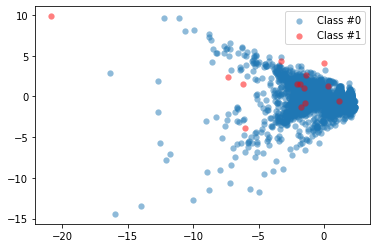

In [13]:
plot_data(X, y)

## Removing class imbalance Techniques
### 1 Random over sampling (ROS)
### 2 Random Under sampling (RUS)
### 3 Synthetic Minority Over-sampling Technique (SMOTE)

By using ROS and SMOTE you add more examples to the minority class. RUS adjusts the balance of your data by reducing the majority class.

In [14]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [15]:
# Define the resampling method
# method = SMOTE(kind='borderline1')
method = SMOTE(kind='regular')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


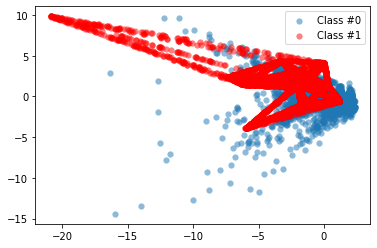

In [16]:
# Create the resampled feature set
X_resampled, y_resampled = method.fit_sample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)
plt.show()

Succes! As you can see, our minority class is now much more prominently visible in our data. To see the results of SMOTE even better, we'll compare it to the original data in the next 

In [17]:
print(pd.value_counts(pd.Series(y)))

# Print the value_counts
print(pd.value_counts(pd.Series(y_resampled)))

0    5486
1      14
dtype: int64
1    5486
0    5486
dtype: int64


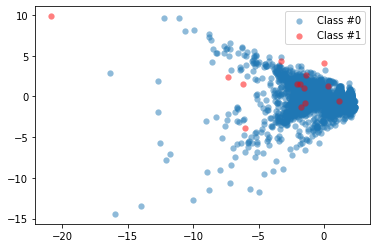

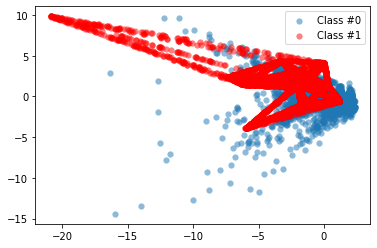

In [18]:
# Compare both the plots
plot_data(X, y)
plot_data(X_resampled, y_resampled)

## Exploring the traditional way to catch fraud

In [19]:
df2=df1.iloc[0:5050,:].drop(columns=['Unnamed: 0','Time','Amount'])
df2.shape

(5050, 29)

In [20]:
df2.iloc[0:5050,:].groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.101664,0.009713,0.440823,0.065828,-0.176007,0.053548,-0.040946,0.025675,0.002215,-0.016758,0.181154,-0.075182,0.049966,0.089864,0.099092,-0.004954,0.042407,-0.037083,-0.034748,0.022369,-0.028713,-0.039589,-0.014607,0.005995,0.080379,0.013802,-0.006723,0.005212
1,-3.905784,1.620038,-4.048780,2.668938,-1.883273,-1.300185,-4.437797,-0.111434,-1.676889,-5.084614,3.111378,-5.325893,-0.641796,-5.365369,-0.109552,-3.760092,-6.406727,-1.988536,0.523673,-0.206057,0.476290,0.067390,-0.184944,-0.095988,0.250236,-0.001566,0.345530,0.113162


In [21]:
# Implement a rule for stating which cases are flagged as fraud
## Just take V1 and V2. V<-3 and V3<-5 will have Class=1 i.e fraud
## use np.where (np.logical_and, 1,0) for this

df2['Considered Fraud']=np.where(np.logical_and(df2.V1<-3,df2.V3<-5),1,0)



In [22]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Considered Fraud
0,1.212511,-0.099054,-1.192094,0.286324,2.160516,3.616314,-0.404207,0.842331,0.169360,-0.030522,-0.541957,0.237212,-0.218130,0.197437,-0.147850,-0.097830,-0.510053,-0.070939,0.355171,0.014777,-0.167496,-0.494695,-0.149785,1.011227,0.883548,-0.329434,0.020370,0.017037,0,0
1,-0.658305,0.406791,2.037461,-0.291298,0.147910,-0.350857,0.945373,-0.172560,0.025133,-0.778135,-0.196290,0.632955,0.374025,-0.531597,-0.615063,-0.518078,0.003881,-1.288954,-0.797804,0.064133,-0.156096,-0.238805,0.089877,0.421195,-0.352487,0.074783,-0.094192,-0.092493,0,0
2,1.105253,0.541842,0.839421,2.570933,-0.279517,-0.423062,0.088019,0.011622,-0.715756,0.651379,0.073787,-0.142024,-0.739457,0.502639,0.736688,0.256745,-0.093732,-1.011416,-1.465500,-0.239883,-0.137434,-0.460991,0.189397,0.556329,0.185786,-0.189030,0.000208,0.026167,0,0
3,1.239495,-0.182609,0.155058,-0.928892,-0.746227,-1.235608,-0.061695,-0.125223,0.984938,-0.746625,1.563459,0.890132,-0.985159,0.778734,1.016974,-0.429490,-0.335787,0.614690,0.703133,-0.160406,0.146077,0.481119,-0.140019,0.538261,0.710720,-0.621382,0.036867,0.010963,0,0
4,-1.571359,1.687508,0.734670,1.293350,-0.217532,-0.002677,0.147364,0.515362,-0.372442,0.078021,-0.592495,0.997941,1.109328,0.060048,0.086141,-1.149893,0.765198,-0.810589,0.737550,-0.093614,0.048549,0.377256,-0.030436,0.117608,-0.060520,-0.296550,-0.481570,-0.167897,0,0


In [23]:
 # a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df2.Class, df2['Considered Fraud'], rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              5020  17
1                 9   4


We detected 4 out of 50 cases.So we have 46 false positives.Next we shall try using machine learning models for this

## Using Machine Learning Model to detect Fraud

In [24]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
# getting the feature variables
df1=pd.read_csv('/content/drive/MyDrive/Learn Data Science/Fraud detection/creditcard_sampledata.csv')

df1.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

In [26]:
X=df1.iloc[0:5050,:].drop(columns=['Unnamed: 0', 'Time','Amount', 'Class']).values
X.shape

(5050, 28)

In [27]:
y=df1.iloc[0:5050,:].drop(columns =['Unnamed: 0', 'Time','Amount'])['Class'].values
y.shape

(5050,)

In [28]:
# make 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Logistic regression object fitting
model= LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#making predictions
predicted=model.predict(X_test)

In [30]:
## get the classification report
from sklearn.metrics import classification_report

In [31]:
classification_report(y_test,predicted)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1510\n           1       1.00      0.40      0.57         5\n\n    accuracy                           1.00      1515\n   macro avg       1.00      0.70      0.79      1515\nweighted avg       1.00      1.00      1.00      1515\n'

In [32]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[1510    0]
 [   3    2]]


In [33]:
X_test.shape

(1515, 28)

In [36]:
# default threshold is 0.5 but we can change it using predict proba
# suppose we change it only for the first feature V1 ie. X
# https://discuss.analyticsvidhya.com/t/what-is-the-difference-between-predict-and-predict-proba/67376/3
threshold = 0.4
y_pred = (model.predict_proba(X_test)[:, 0]> threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[   0, 1510],
       [   2,    3]])

In [37]:
# default threshold is 0.5 but we can change it using predict proba
threshold = 0.4
y_pred = (model.predict_proba(X_test)[:, 1] > threshold).astype('float')
confusion_matrix(y_test, y_pred)

array([[1510,    0],
       [   3,    2]])

We are getting far fewer false positives, so that's an improvement. Also, we're catching a higher percentage of fraud cases, so that is also better than before. 
Why do we have fewer observations to look at in the confusion matrix? 
Remember we are using only our test data to calculate the model results on. 
We're comparing the crosstab on the full dataset from the last step, with a confusion matrix of only 30% of the total dataset, so that's where that difference comes from. 
Next, we'll dive deeper into understanding these model performance metrics. 
Let's now explore whether we can improve the prediction results even further with resampling methods.

## Logistic regression combined with SMOTE
### step-1. Making Pipeline for resampling and preferred model

In [38]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

In [39]:
# Define which resampling method and which ML model to use in the pipeline
resampling = SMOTE(kind='borderline2')
model = LogisticRegression()

In [40]:
# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

## Step-2 Using the Pipeline on Test and train data

In [41]:
# Split  X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [43]:
# Fit  pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
print('Classifcation report:\n', classification_report(y_test, predicted))

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1510
           1       0.50      0.80      0.62         5

    accuracy                           1.00      1515
   macro avg       0.75      0.90      0.81      1515
weighted avg       1.00      1.00      1.00      1515



In [45]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Confusion matrix:
 [[1506    4]
 [   1    4]]


SMOTE slightly improves our results.
 We now manage to find all cases of fraud, but we have a 4 false positives cases. 
 Not in all cases does resampling necessarily lead to better results. When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias. Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly. 